<a href="https://colab.research.google.com/github/Rgarlay/PWSkills_Assignments/blob/main/Assignment%3A%20EDA/EDA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bike Dataset

In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [630]:
df = pd.read_csv('/content/BIKE DETAILS.csv')


In [631]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [632]:
df.shape

(1061, 7)

In [633]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [634]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
df['ex_showroom_price'].isna().sum()/df.shape[0]

0.40999057492931196

Empty rows in 'ex_showroom_price' are above 40%. It is recommended to drop it in real analysis. However, it is necessary for answering questions, so we will leave it unaltered.

In [635]:
df.duplicated().sum()

6

In [636]:
df = df.drop_duplicates()

1. What is the range of selling prices in the dataset.


In [ ]:
range = df['selling_price'].max() - df['selling_price'].min()
a = df['selling_price'].max()
b = df['selling_price'].min()
print(f'range is:{b} - {a}')


range is:5000 - 760000


2. What is the median selling price for bikes in the dataset.


In [ ]:
median_1 = df['selling_price'].median()
print(median_1)

45000.0


3. What is the most common seller type?


In [ ]:
from scipy.stats import mode

df['seller_type'].mode()[0]

'Individual'

In [ ]:
df['seller_type'].value_counts().to_frame().head(1)

,count
seller_type,
Individual,1049


4.How many bikes have driven more than 50,000 kilometers?


In [ ]:
df[df['km_driven'] > 50000]['name'].nunique()

77

5.What is the average km_driven value for each ownership type?


In [ ]:
df.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32732.710240
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6.What proportion of bikes are from the year 2015 or older?


In [638]:
no_of_bikes = df[df['year']<=2015].shape[0]/df.shape[0]
print(f'No. of bikes before or from year 2015: {no_of_bikes}')

No. of bikes before or from year 2015: 0.5658767772511848


7. What is the trend of missing values across the dataset?


In [ ]:
df.isna().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,433


In [ ]:
#Percent of empty row compared to entire dataset.
df['ex_showroom_price'].isna().sum()/df.shape[0]

0.4104265402843602

<Axes: >

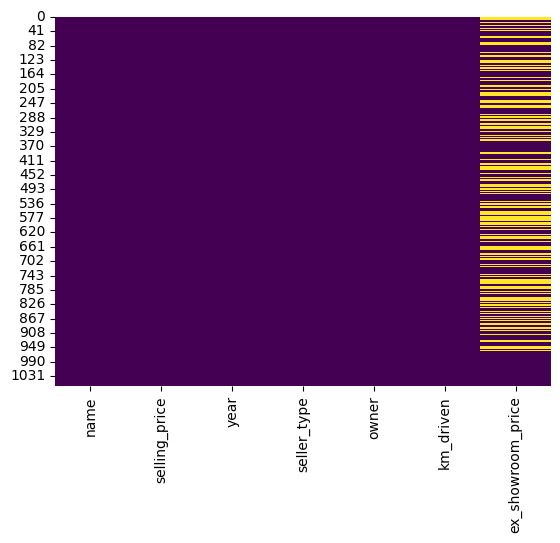

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

8. What is the highest `ex_showroom_price` recorded, and for which bike.


In [641]:
df[df['ex_showroom_price']==df['ex_showroom_price'].max()][['name','ex_showroom_price']]

,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


9. What is the total number of bikes listed by each seller type?


In [ ]:
df.groupby('seller_type').size()

,0
seller_type,
Dealer,6
Individual,1049


10.  What is the relationship between `selling_price` and `km_driven` for first-owner bikes?


In [ ]:
df[df['owner'] == '1st owner']['selling_price'].corr(df[df['owner'] == '1st owner']['km_driven'])

-0.24220488863659748

11. Identify and remove outliers in the km_driven column using the IQR method.


<Axes: xlabel='km_driven'>

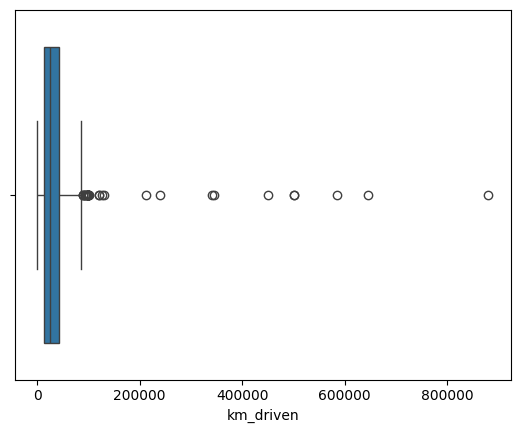

In [ ]:
sns.boxplot(x = df['km_driven'])

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]


In [ ]:
df_no_outliers.shape[0]/df.shape[0]

0.9639810426540284

We're left with 96% of readings.

12. Perform a bivariate analysis to visualize the relationship between `year` and `selling_price`.


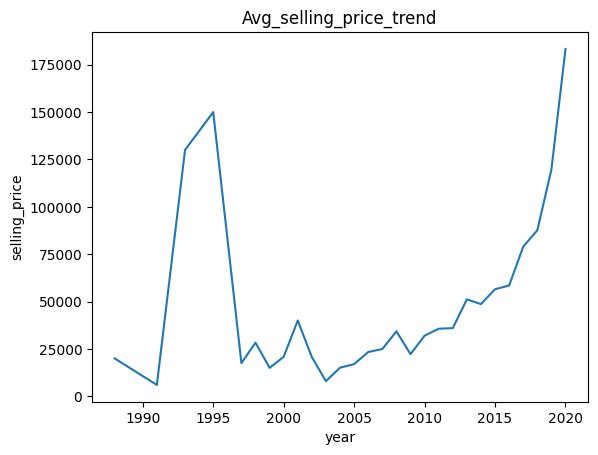

In [649]:
analysis = df.groupby('year')[['selling_price']].mean()
sns.lineplot(data = analysis,x ='year',y = 'selling_price')
plt.title('Avg_selling_price_trend')
plt.show()

13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year).

In [649]:
'''
There's no information about manufacturing year or even number of year used.
Hence, we cannot conclude average based on time frame.
'''

In [651]:
df.sample(1)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
25,Honda Dream Yuga,25000,2012,Individual,1st owner,35000,56147.0


14. Which bike names are priced significantly above the average price for their manufacturing year.

In [685]:
dist_price = df.groupby(['year','name'])['selling_price'].mean()
avg_price = df.groupby('year')['selling_price'].mean()

In [686]:
dist_price =  dist_price.reset_index()
avg_price =  avg_price.reset_index()
final_df = dist_price.merge(avg_price, on = 'year', how = 'inner',suffixes=('_df1', '_df2'))
final_df_1 = final_df[final_df['selling_price']>final_df['selling_avg']]
final_df_1['name']

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.


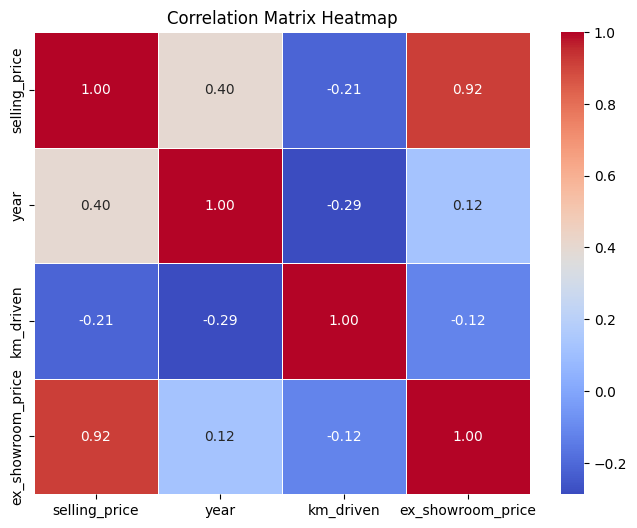

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#Car Sale Dataset




In [705]:
df = pd.read_csv('/content/Car Sale.csv')

In [706]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?


In [ ]:
dealers_avg = df.groupby('Dealer_Name')['Price ($)'].mean()
dealers_avg

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [ ]:
print(f"range is {dealers_avg.min()} - {dealers_avg.max()}")

##Since range is very small, hence the average price for all dealers
#is almost same.


range is 27217.261562998407 - 28769.919005613472


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends.


In [ ]:

##Coefficent of vairation is defined as 100 * (standard_deviation/mean)
df_2 = df.copy()


price_variation = df.groupby('Company')['Price ($)'].agg(['std','mean'])
price_variation['cv'] = 100 * (price_variation['std']/price_variation['mean'])
price_variation.sort_values(by=['cv'],ascending=False).head(1)

,std,mean,cv
Company,,,
Plymouth,19065.997338,29404.980551,64.839347


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare.

<Axes: xlabel='Transmission', ylabel='Price ($)'>

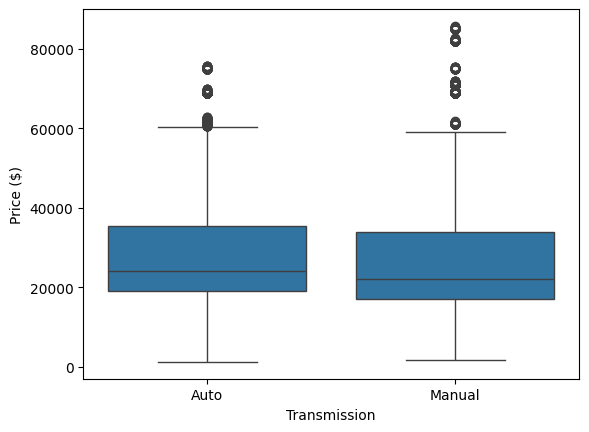

In [ ]:
sns.boxplot(x = 'Transmission',y = 'Price ($)', data = df)

Note that IQR range for auto is higher on than manual, meaning that it is more expensive.

In [ ]:
Q1_auto = df[df['Transmission'] == 'Auto']['Price ($)'].quantile(0.25)
Q3_auto = df[df['Transmission'] == 'Auto']['Price ($)'].quantile(0.75)

IQR_auto = Q3_auto - Q1_auto
IQR_auto

Q1_manual = df[df['Transmission'] == 'Manual']['Price ($)'].quantile(0.25)
Q3_manual = df[df['Transmission'] == 'Manual']['Price ($)'].quantile(0.75)

IQR_manual = Q3_manual - Q1_manual
print(f'IQR for manual: {IQR_manual}, IQR for auto: {IQR_auto}')

IQR for manual: 17000.0, IQR for auto: 16500.0


IQR for manual is greater than auto. This means that it has wider price range,
when it comes to pricing.

4. What is the distribution of car prices across different regions?


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

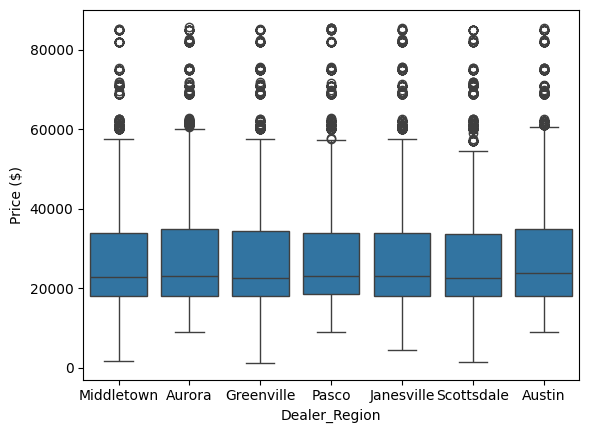

In [ ]:
sns.boxplot(x = 'Dealer_Region',y = 'Price ($)', data = df)

5. What is the distribution of cars based on body styles?


<Axes: xlabel='Body Style', ylabel='Price ($)'>

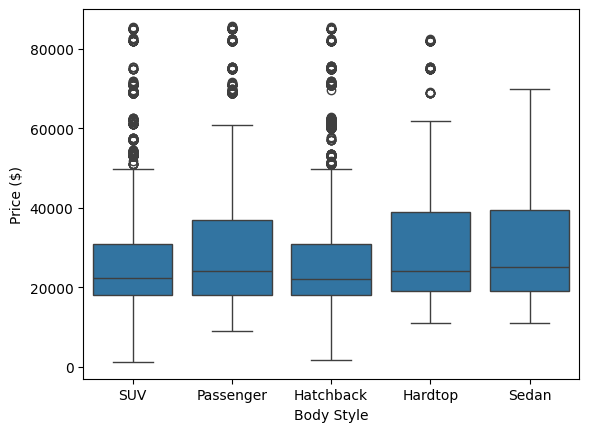

In [ ]:
sns.boxplot(x = 'Body Style',y = 'Price ($)', data = df)

6. How does the average selling price of cars vary by customer?


<Axes: xlabel='Annual Income', ylabel='Price ($)'>

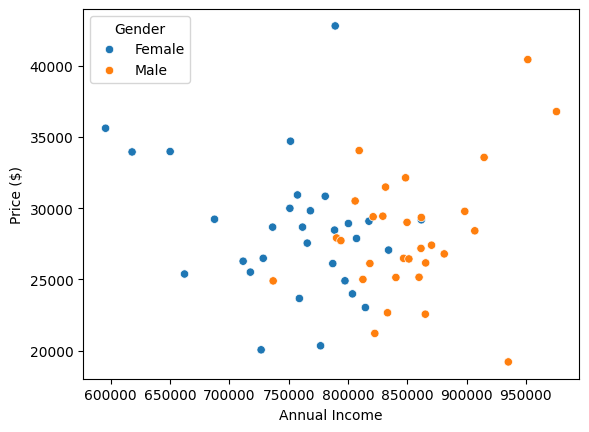

In [ ]:
# gender and annual income..
avg_price_vary = df.groupby(['Gender','Company'])[['Annual Income','Price ($)']].mean().reset_index()
sns.scatterplot(x = 'Annual Income',y= 'Price ($)',data = avg_price_vary,hue = 'Gender')

7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

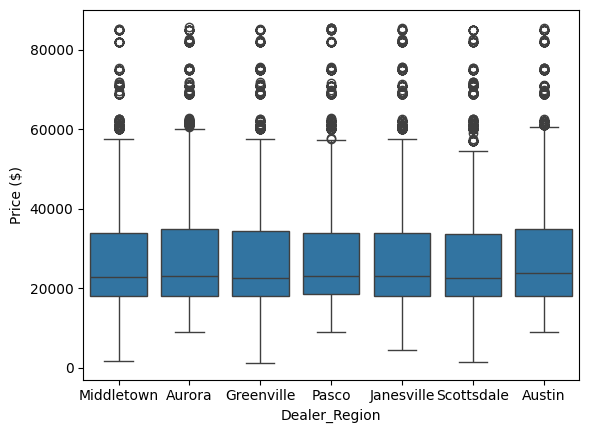

In [ ]:
##Distribution of car price by region.
sns.boxplot(x = 'Dealer_Region',y = 'Price ($)', data = df)


In [ ]:
##No of cars sold per region
no_of_cars = df.groupby('Dealer_Region')['Car_id'].count()
no_of_cars = no_of_cars.to_frame()
no_of_cars

,Car_id
Dealer_Region,
Aurora,3130
Austin,4135
Greenville,3128
Janesville,3821
Middletown,3128
Pasco,3131
Scottsdale,3433


[Text(0.5, 0, 'region'),
 Text(0, 0.5, 'No_of_cars'),
 Text(0.5, 1.0, 'No_of_carrs_by_region')]

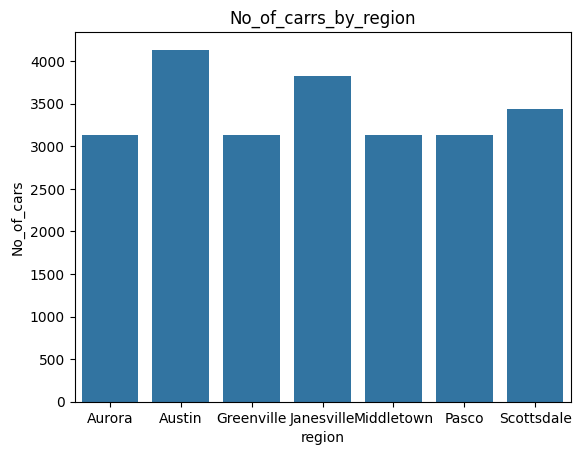

In [ ]:
fig = sns.barplot(x = 'Dealer_Region', y = 'Car_id', data = no_of_cars)
fig.set(xlabel='region',ylabel = 'No_of_cars',title = 'No_of_carrs_by_region')

8. How does the average car price differ between cars with different engine sizes.

In [ ]:
#avg_car_price = df.groupby('D')
avg_car_price = df.groupby('Engine')['Price ($)'].mean()
avg_car_price

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Car with Double Overhead Camshadt is slightly more expensive.

9. How do car prices vary based on the customer’s annual income bracket?

<Axes: xlabel='Annual Income', ylabel='Count'>

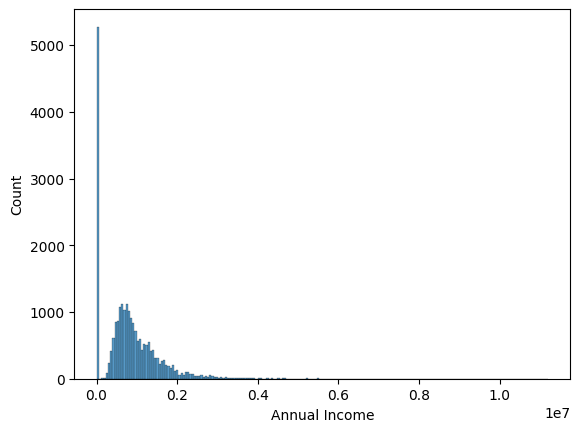

In [ ]:
sns.histplot(x=df['Annual Income'])

Data is corrupted with outliers. Before making any sensible prediction, we will do outlier removal.

<Axes: xlabel='Annual Income', ylabel='Count'>

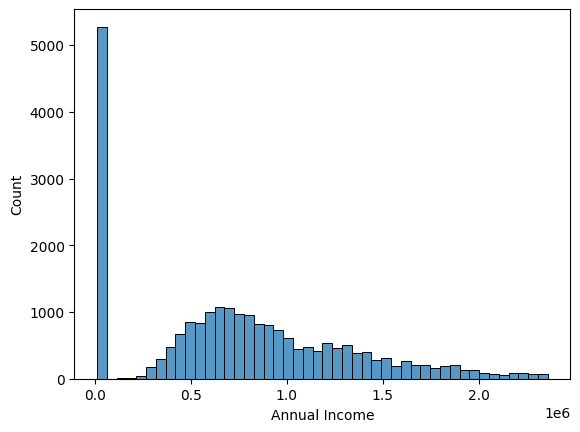

In [ ]:
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Annual Income'] >= lower_bound) & (df['Annual Income'] <= upper_bound)]
sns.histplot(data =df_no_outliers['Annual Income'])

<ipython-input-113-ac5d03f2d596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Annual Income'] = pd.cut(df_no_outliers['Annual Income'],


<Axes: xlabel='Annual Income', ylabel='Count'>

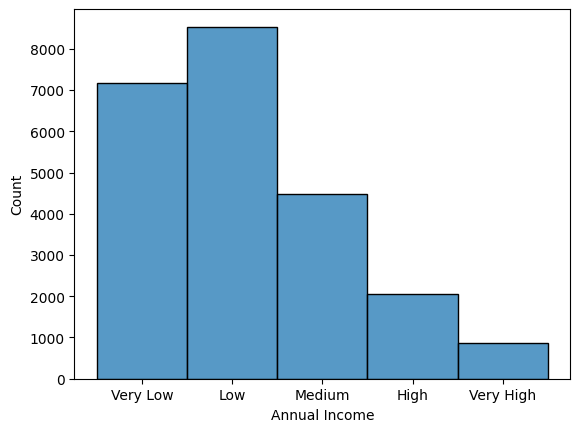

In [ ]:
df_no_outliers['Annual Income'] = pd.cut(df_no_outliers['Annual Income'],
                                         bins = 5,
                                         labels=['Very Low','Low',
                                            'Medium', 'High', 'Very High'])
sns.histplot(df_no_outliers['Annual Income'])

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

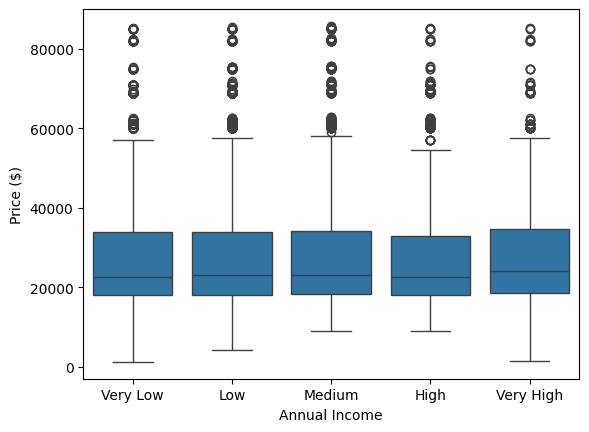

In [ ]:
sns.boxplot(x = 'Annual Income',y = 'Price ($)', data = df_no_outliers)

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
##Top 5 cars models with highest number of sails
#df.head()
highest_val = df.groupby('Model')[['Car_id','Price ($)']].sum().sort_values(by= 'Car_id',ascending=False)
highest_val = highest_val.reset_index()
highest_val.head(5)

,Model,Car_id,Price ($)
0,Avalon,C_CND_005324C_CND_006304C_CND_006528C_CND_0076...,270002
1,RX300,C_CND_002317C_CND_004832C_CND_007441C_CND_0086...,270302
2,Century,C_CND_001172C_CND_001586C_CND_002210C_CND_0029...,750263
3,Mirage,C_CND_000941C_CND_002045C_CND_002534C_CND_0090...,172204
4,Alero,C_CND_000863C_CND_004076C_CND_005411C_CND_0071...,307302


In [ ]:
##Price distribution for these 5 models
x = []
i = 0
while i<=4:
  y = highest_val['Price ($)'][i]
  x.append(y)
  i = i+1
x

labels = []
j = 0
while j<=4:
  y_1 = highest_val['Model'][j]
  labels.append(y_1)
  j = j+1
labels


['Avalon', 'RX300', 'Century', 'Mirage', 'Alero']

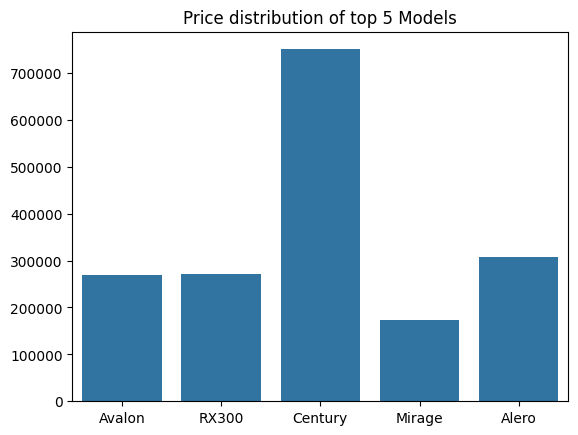

In [ ]:
sns.barplot(x = labels,y= x)
plt.title('Price distribution of top 5 Models')
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

<Axes: xlabel='Engine', ylabel='Price ($)'>

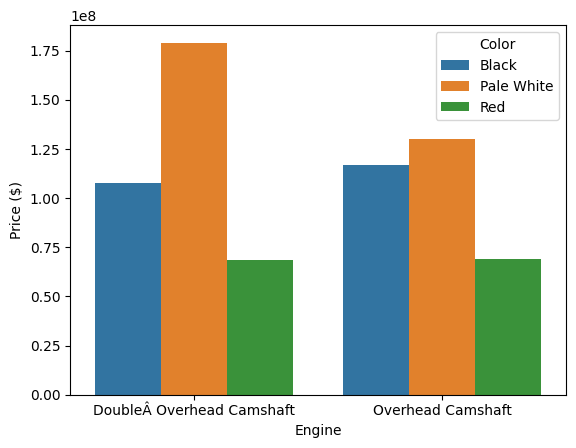

In [ ]:
color_price = df.groupby(['Engine','Color'])['Price ($)'].sum().reset_index()
sns.barplot(data = color_price, x = 'Engine',y = 'Price ($)', hue = 'Color')

12. Is there any seasonal trend in car sales based on the date of sale?


In [ ]:
##Not able to solve this.

13. How does the car price distribution change when considering different combinations of body style and transmission type?

In [ ]:
body_transmission = df.groupby(['Body Style','Transmission'])['Price ($)'].mean().reset_index()
body_transmission

,Body Style,Transmission,Price ($)
0,Hardtop,Auto,31520.188210
1,Hardtop,Manual,27016.943698
2,Hatchback,Auto,25910.544824
3,Hatchback,Manual,28702.550562
4,Passenger,Auto,28915.835149
5,Passenger,Manual,28969.521039
6,SUV,Auto,27501.404407
7,SUV,Manual,26079.019161
8,Sedan,Auto,29955.294344
9,Sedan,Manual,29664.271572


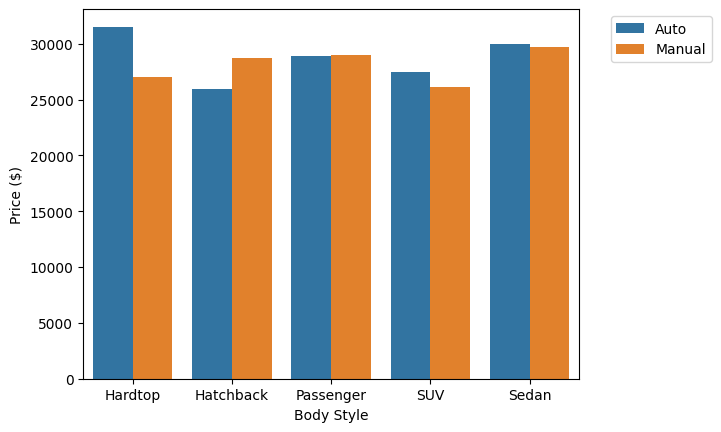

In [ ]:
sns.barplot(data = body_transmission,x = 'Body Style',y = 'Price ($)',hue = 'Transmission')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [ ]:
df_1 = pd.get_dummies(data = df,columns = ['Engine'],drop_first=True)

<Axes: >

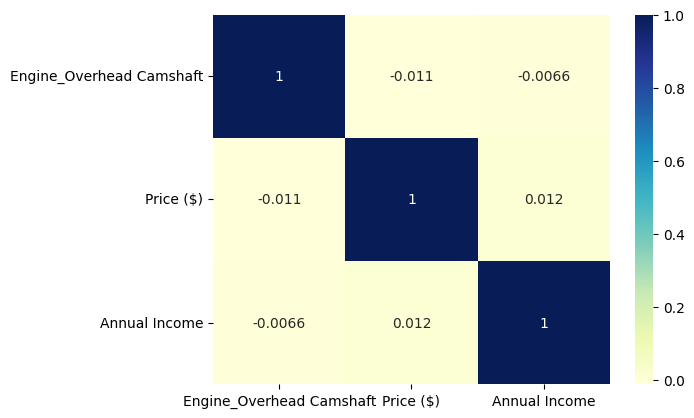

In [ ]:
df_1['Engine_Overhead Camshaft'] = df_1['Engine_Overhead Camshaft'].astype(bool)
df_2 = df_1[['Engine_Overhead Camshaft','Price ($)','Annual Income']]

sns.heatmap(data = df_2.corr(),cmap = 'YlGnBu',annot=True)

15.How does the average car price vary across different car models and engine types?

In [ ]:
df.groupby(['Model','Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

#Amazon Sales Dataset

In [707]:
df = pd.read_csv('/content/amazon.csv')

In [708]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Some feature transformation and null values removal of data.

In [ ]:
df['discounted_price'] = df['discounted_price'].str.replace('₹','')
df['discounted_price'] = df['discounted_price'].str.replace(',','')
df['discounted_price'] = df['discounted_price'].astype(float)

In [ ]:
df['actual_price'] = df['actual_price'].str.replace('₹','')
df['actual_price'] = df['actual_price'].str.replace(',','')
df['actual_price'] = df['actual_price'].astype(float)

In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','')
df['discount_percentage'] = df['discount_percentage'].astype(float)

In [ ]:
df['rating'] = df['rating'].str.replace(r'[^\d.]','' , regex = True)
df['rating'] = df['rating'].replace('',np.nan)
df = df.dropna()
df['rating'] = df['rating'].astype(float)

<ipython-input-311-6d3b10df6878>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)


In [ ]:
df['rating_count'] = df['rating_count'].str.replace(',','')
df['rating_count'] = df['rating_count'].astype(int)

<ipython-input-312-7fe75f2f1cab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_count'] = df['rating_count'].str.replace(',','')
<ipython-input-312-7fe75f2f1cab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_count'] = df['rating_count'].astype(int)


In [ ]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [ ]:
split_cols=df['category'].str.split('|',expand=True)

In [ ]:
split_cols.isna().sum()/split_cols.shape[0]

,0
0,0.000000
1,0.000000
2,0.005472
3,0.112859
4,0.645007
5,0.942544
6,0.991108


Since, column 4,5,6 have all null values, we will drop them.

In [ ]:
split_cols.columns = [f'level_{i+1}' for i in range(split_cols.shape[1])]
split_cols.drop(columns = ['level_5','level_6','level_7'], inplace=True)

In [ ]:
df = pd.concat([df,split_cols], axis = 1)

In [ ]:
df['level_3'] = df['level_3'].fillna(method = 'ffill')
df['level_4'] = df['level_4'].fillna(method = 'ffill')

<ipython-input-350-fbc84f3b7f02>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['level_3'] = df['level_3'].fillna(method = 'ffill')


In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,level_1,level_2,level_3,level_4
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


In [ ]:
df.drop(columns = ['category'], inplace=True)

In [ ]:
split_id = df['review_id'].str.split(',',expand=True)
split_title = df['review_title'].str.split(',',expand=True)
split_content = df['review_content'].str.split(',',expand=True)

####1. What is the average rating for each product category?

In [ ]:
level_1_avg = df.groupby('level_1')['rating'].mean().reset_index().head()
level_2_avg = df.groupby('level_2')['rating'].mean().reset_index().head()
level_3_avg = df.groupby('level_3')['rating'].mean().reset_index().head()
level_4_avg = df.groupby('level_4')['rating'].mean().reset_index().head()

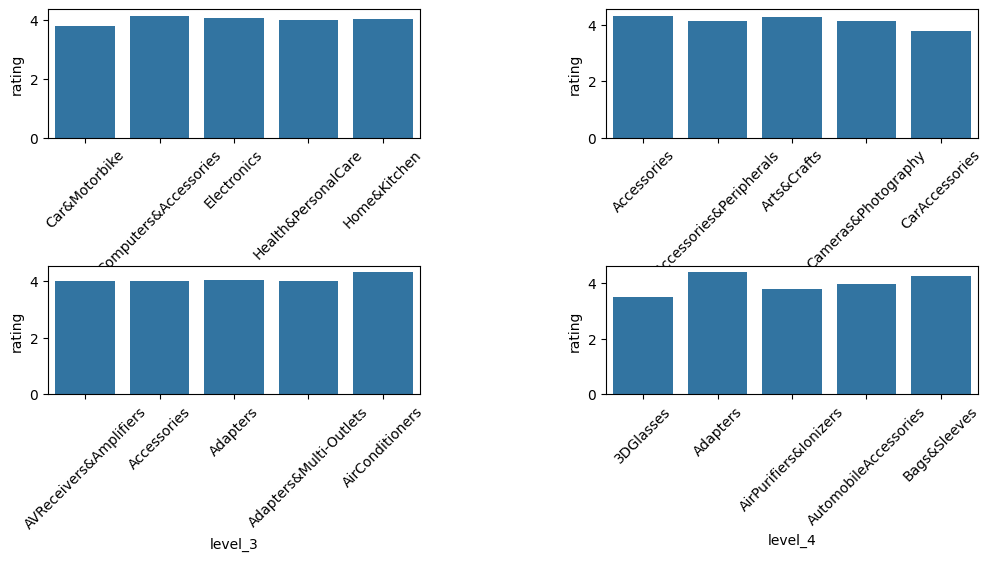

In [ ]:
fig,axes = plt.subplots(2,2, figsize = (12,5))

axes1 = sns.barplot(x = level_1_avg['level_1'],y = level_1_avg['rating'],ax = axes[0,0])
axes2 = sns.barplot(x = level_2_avg['level_2'],y = level_2_avg['rating'],ax = axes[0,1])
axes3 = sns.barplot(x = level_3_avg['level_3'],y = level_3_avg['rating'],ax = axes[1,0])
axes4 = sns.barplot(x = level_4_avg['level_4'],y = level_4_avg['rating'],ax = axes[1,1])


for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)


plt.subplots_adjust(wspace = 0.5,hspace = 1)
plt.show()

####2.What are the top rating_count products by category?


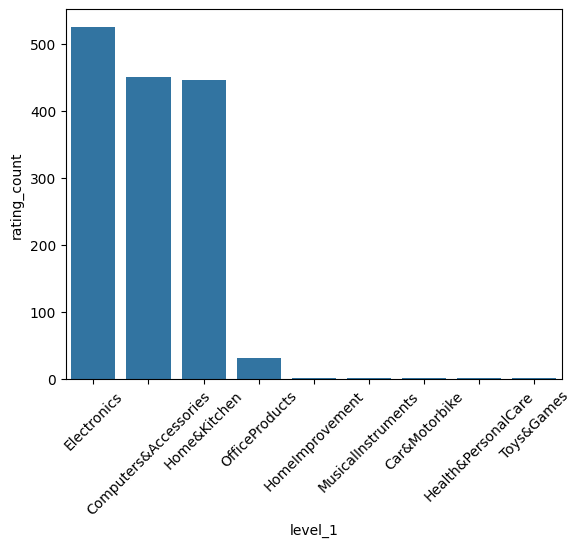

In [ ]:
rating_couting_1 = df.groupby('level_1')['rating_count'].count().sort_values(ascending=False)
rating_couting_1 = rating_couting_1.to_frame()
sns.barplot(data = rating_couting_1, y= 'rating_count',x = 'level_1')
plt.xticks(rotation = 45)
plt.show()

####3. What is the distribution of discounted prices vs. actual prices?

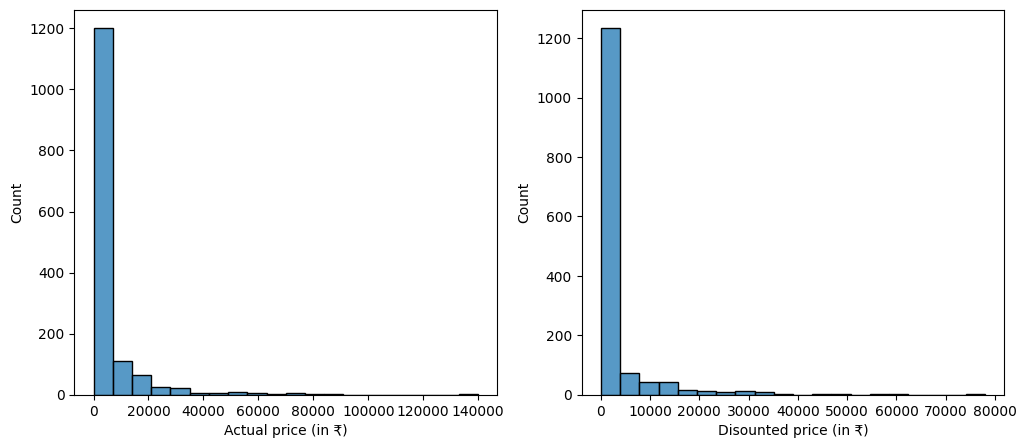

In [ ]:
x = df['actual_price']
y = df['discounted_price']
fig,axes = plt.subplots(1,2, figsize = (12,5))

axes1 = sns.histplot(data = x,ax = axes[0], bins = 20)
axes2 = sns.histplot(data = y, ax = axes[1], bins = 20)

#plt.xticks(np.arange(30, 1000, 100))
axes[0].set_xlabel('Actual price (in ₹)')
axes[1].set_xlabel('Disounted price (in ₹)')

plt.show()

Since, this is uninterpreatable. We will do outlier analysis.

<Axes: xlabel='actual_price', ylabel='Count'>

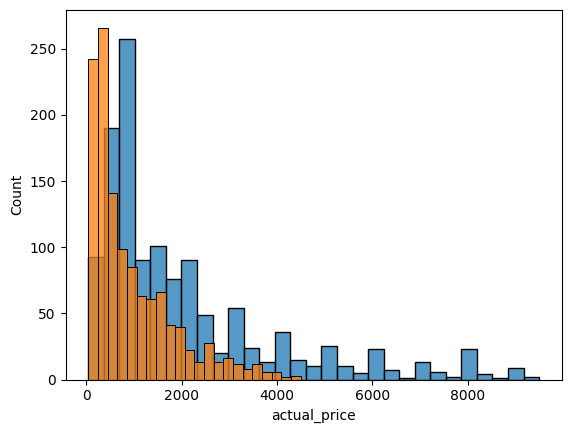

In [ ]:
##actual price
Q1_actual = df['actual_price'].quantile(0.25)
Q3_actual = df['actual_price'].quantile(0.75)
IQR_actual = Q3_actual - Q1_actual

lower_bound_actual = Q1_actual - 1.5 * IQR_actual
upper_bound_actual = Q3_actual + 1.5 * IQR_actual
df_no_outliers_actual = df[(df['actual_price'] >= lower_bound_actual) & (df['actual_price'] <= upper_bound_actual)]

sns.histplot(data=df_no_outliers_actual['actual_price'])


##Discounted price
Q1_discounted = df['discounted_price'].quantile(0.25)
Q3_discounted = df['discounted_price'].quantile(0.75)
IQR_discounted = Q3_discounted - Q1_discounted

lower_bound_discounted = Q1_discounted - 1.5 * IQR_discounted
upper_bound_discounted = Q3_discounted + 1.5 * IQR_discounted
df_no_outliers_discounted = df[(df['discounted_price'] >= lower_bound_discounted) & (df['discounted_price'] <= upper_bound_discounted)]

sns.histplot(data=df_no_outliers_discounted['discounted_price'])


As observed, dicounted price has more right skew and has very almost no items beyond 4500 rupees.

In [ ]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,level_1,level_2,level_3,level_4
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


####4.' How does the average discount percentage vary across categories?

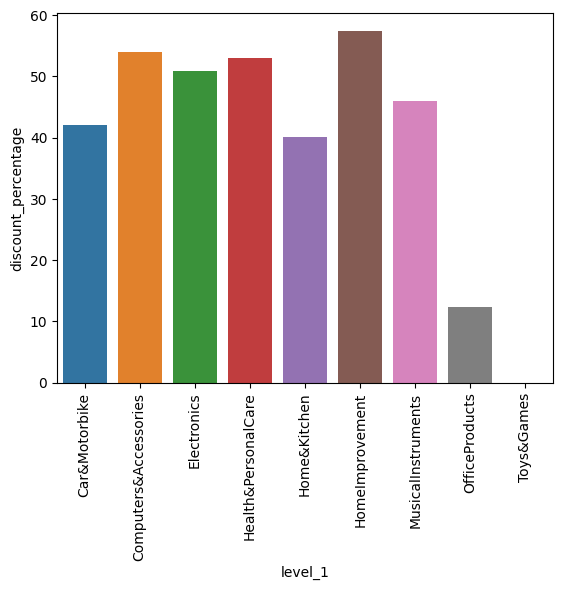

In [ ]:
avg_var = df.groupby('level_1')['discount_percentage'].mean().reset_index()
sns.barplot(data = avg_var,x = 'level_1',y = 'discount_percentage', hue = 'level_1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,level_1,level_2,level_3,level_4
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


####5.What are the most popular product names?

In [ ]:
##Let us define Popularity of product_names.

##We will define popularity as to how many user_ids are associated with that product.

split_user_ids = df['user_id'].str.split(',', expand=True)
split_user_ids.isna().sum()/split_user_ids.shape[0]

,0
0,0.000000
1,0.001368
2,0.008892
3,0.013680
4,0.019836
5,0.026676
6,0.030780
7,0.037620


Since each column has `<5%` of missing user_ids, we can put  use `mode` to fill that gap.

In [ ]:
split_user_ids

['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7']

In [ ]:
split_user_ids = split_user_ids.fillna(method = 'ffill')
split_user_ids.columns = [f'id_{i}' for i in range(split_user_ids.shape[1])]
df_popular = pd.concat([df, split_user_ids], axis = 1)

<ipython-input-437-0fb9e368e2af>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  split_user_ids = split_user_ids.fillna(method = 'ffill')


In [ ]:
df_popular.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_id', 'user_name', 'review_id', 'review_title', 'review_content',
       'img_link', 'product_link', 'level_1', 'level_2', 'level_3', 'level_4',
       'id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7'],
      dtype='object')

In [ ]:
popularity_index = df_popular.groupby('product_name')[['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7']].count()
popularity_index['sum_of_all'] = popularity_index[['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7']].sum(axis = 1).reset_index()
popularity_index = popularity_index.reset_index()
popularity_index[['product_name','sum_of_all']].sort_values(by = 'sum_of_all',ascending=False).head()

,product_name,sum_of_all
382,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",40
384,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,32
378,Fire-Boltt India's No 1 Smartwatch Brand Talk ...,24
323,Duracell USB C To Lightning Apple Certified (M...,24
972,"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...",24


####6.What are the most popular product keywords?

In [ ]:
#I assume, this talks about the 'about_product' column, since that is where all specifications of products lie.
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text = df['about_product'].str.cat(sep = ' ')
text

'High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don\'t hesitate to contact us. Compatible with all Type C enabled de

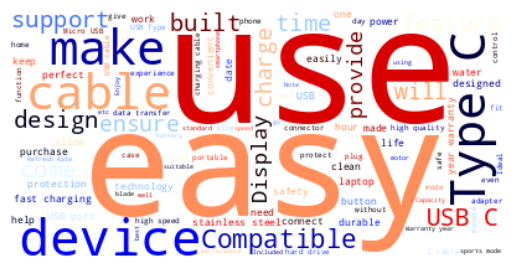

In [ ]:
stopwords = set(STOPWORDS)

cloud = WordCloud(stopwords = stopwords,colormap = 'flag',background_color='white').generate(text)

plt.plot()
plt.imshow(cloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

The size of the word displays is proportional to its frequency in the text.

###7.  What are the most popular product reviews?

To se that, we can divide all the review title and display the most popular review title on word cloud.

In [ ]:
pd.set_option('display.max_columns',None)
df_popular.head(1)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,level_1,level_2,level_3,level_4,id_0,id_1,id_2,id_3,id_4,id_5,id_6,id_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ


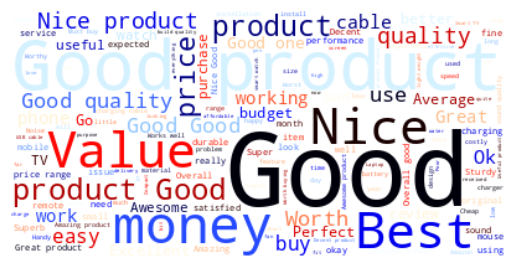

In [ ]:
reviews = df['review_title'].str.cat(sep = ' ')

clod_1 = WordCloud(stopwords = stopwords, background_color = 'white',colormap = 'flag').generate(reviews)

plt.plot()
plt.imshow(clod_1, interpolation= 'bilinear')
plt.axis('off')
plt.show()

####8. What is the correlation between discounted_price and rating?

In [ ]:
df['discounted_price'].corr(df['rating'])

0.12113187526066266

####9. What are the Top 5 categories based on the highest ratings?

In [ ]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,level_1,level_2,level_3,level_4
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


In [ ]:
df.groupby(['level_1','level_2','level_3','level_4'])['rating'].max().sort_values(ascending=False).head()

level_1                level_2                     level_3                      level_4            
Computers&Accessories  Accessories&Peripherals     Cables&Accessories           Cables                 5.0
                                                   Keyboards,Mice&InputDevices  Mice                   5.0
Home&Kitchen           Kitchen&HomeAppliances      SmallKitchenAppliances       DeepFatFryers          4.8
                                                                                HandBlenders           4.8
                       Heating,Cooling&AirQuality  WaterHeaters&Geysers         InstantWaterHeaters    4.8
Name: rating, dtype: float64

###10.Identify any potential areas for improvement or optimization based on the data analysis.
Ans:- Datatable couples multiple categories in one column. For example, `Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables`
is a single column. Furthermore, `review title` and `review content` has multiple ids and statements. They need to be seperated and preprocessed before any further analysis. This can potentially smoothen the analysis.


#Spotify Dataset

1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.


In [ ]:
df = pd.read_csv('/content/spotify.csv')

In [ ]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [ ]:
df.isna().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
df.duplicated().sum()

27

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

In [628]:
popularity_val = df.groupby('Track Name')['Popularity'].sum().sort_values(ascending=False).reset_index().head(20)

In [ ]:
import plotly.express as px

fig = px.bar(popularity_val, x='Popularity', y='Track Name',
             labels={'Popularity': 'Popularity', 'Artist': 'Artist'},
             title='Artist Popularity',
             orientation='h',
             color='Popularity',
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Popularity',
    yaxis_title='Artist',
    plot_bgcolor='white',
)
fig.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [ ]:
durat_pop = df.groupby(['Track Name','Duration (ms)'])['Popularity'].sum().sort_values(ascending=False).reset_index()
durat_pop['Duration (s)'] = durat_pop['Duration (ms)']/1000

In [ ]:
fig = px.scatter(durat_pop,x = 'Duration (s)',y='Popularity',
                 labels = {'Duration (s)':'Duration (s)','Popularity':'Popularity'},
                 title = 'Popularity and Duration relation',color='Popularity',
                 color_continuous_scale = 'amp')

fig.update_layout()
fig.show()

In [ ]:
durat_pop.head()

,Track Name,Duration (ms),Popularity,Duration (s)
0,Dial Drunk (with Post Malone),213817,154,213.817
1,Lovin On Me,138411,97,138.411
2,CARNIVAL,264324,96,264.324
3,redrum,270697,96,270.697
4,FE!N (feat. Playboi Carti),191700,93,191.700


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

In [ ]:
highest_tracks = df.groupby('Artist')['Track Name'].count().sort_values(ascending=False).reset_index()

In [ ]:
scat = px.histogram(highest_tracks,x = 'Artist',y = 'Track Name',
                    title = 'Artist vs Their tracks',
                    color='Artist')
scat.update_layout(xaxis_title = 'Artist_Name',yaxis_title = 'Count')
scat.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [ ]:
df.groupby(['Artist','Track Name'])['Popularity'].count().sort_values(ascending=True).head()

Artist               Track Name                                                                                   
*NSYNC               Better Place (Reunion)                                                                           1
Metro Boomin         Annihilate (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee, Lil Wayne, Offset)    1
Megan Thee Stallion  Thot Shit                                                                                        1
                     Sweetest Pie                                                                                     1
                     HISS                                                                                             1
Name: Popularity, dtype: int64

6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [ ]:
df.groupby('Artist')['Popularity'].max().sort_values(ascending=False).reset_index().head(1)

,Artist,Popularity
0,Jack Harlow,97


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [ ]:
most_pop = df.groupby('Artist')['Popularity'].max().sort_values(ascending=False).reset_index().head(5)
most_pop_1 = [most_pop['Artist'][i] for i in range(len(most_pop))]

In [ ]:
x = {}
for i,j in enumerate(most_pop_1):
  matching_track =  df[df['Artist']==j]['Track Name'].tolist()
  if matching_track:
    x[j]=matching_track
x

{'Jack Harlow': ['Lovin On Me',
  'First Class',
  'Tyler Herro',
  'WHATS POPPIN',
  'Whats Poppin (feat. DaBaby, Tory Lanez & Lil Wayne) [Remix] - Bonus Track',
  "They Don't Love It",
  'I WANNA SEE SOME ASS (feat. jetsonmade)'],
 '¥$': ['CARNIVAL',
  'BURN',
  'FUK SUMN',
  'BACK TO ME',
  'STARS',
  'DO IT',
  'TALKING',
  'PAID',
  'PAPERWORK',
  'VULTURES'],
 '21 Savage': ['née-nah',
  'redrum',
  'n.h.i.e.',
  'Glock In My Lap',
  'all of me',
  'ball w/o you',
  'prove it',
  'pop ur shit',
  'dangerous',
  'Ghostface Killers (feat. Travis Scott)'],
 'Travis Scott': ['MELTDOWN (feat. Drake)',
  'FE!N (feat. Playboi Carti)',
  'I KNOW ?',
  'MY EYES',
  'goosebumps',
  'SICKO MODE',
  'TELEKINESIS (feat. SZA & Future)',
  'SKITZO (feat. Young Thug)',
  'CIRCUS MAXIMUS (feat. The Weeknd & Swae Lee)'],
 'cassö': ['Prada']}

8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [ ]:
numeric = px.scatter(df,x = 'Duration (ms)',y = 'Popularity',
                     color_continuous_scale = 'amp',color = 'Popularity')

numeric.update_layout(xaxis_title = 'Duration',yaxis_title='Popularity',
                      title = 'Pairplot')
numeric.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

In [625]:
boxplt = px.box(df, x = 'Artist',y = 'Duration (ms)', color='Artist')
boxplt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

In [627]:
swarm_plt = px.violin(df, x= 'Artist',y = 'Popularity')
swarm_plt.show()